In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [3]:
titanic_data = pd.read_csv('train.csv', index_col = 'PassengerId')
profile = ProfileReport(titanic_data, title="Pandas Profiling Report",explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [1]:
"""
SURVIVED_COL = 'Survived'
NAME_COL = 'Name'
SEX_COL = 'Sex'
CLASS_COL = 'Pclass'
AGE_COL = 'Age'
SIBSP_COL= 'SibSp'
PARCH_COL = 'Parch'
TICKET_COL ='Ticket'
PRICE_COL = 'Fare'
CABIN_COL = 'Cabin'
PORT_COL = 'Embarked'
STATUS_COL = 'Status'
"""

In [1]:
column_names = titanic_data.columns
DATA_LEN = len(titanic_data)

# Context

In [2]:
titanic_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


## Columns meaning
* Name: Name of passenger
* Survival: is or not survived(0 = No, 1 = Yes)
* Pclass: Ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)
* Sex: Sex
* Age: Age in years
* Sibsp: count of siblings / spouses aboard the Titanic (brother, sister, stepbrother, stepsister; husband, wife (mistresses and fiancés were ignored))
* Parch: count of parents / children aboard the Titanic (Some children travelled only with a nanny, therefore parch=0 for them)
* Ticket: Ticket number
* Fare: Ticket Price
* Cabin: Cabin number
* Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


<AxesSubplot:ylabel='Survived'>

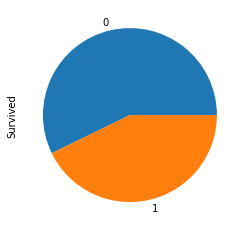

In [4]:
titanic_data[SURVIVED_COL].value_counts().plot.pie()

<AxesSubplot:ylabel='Sex'>

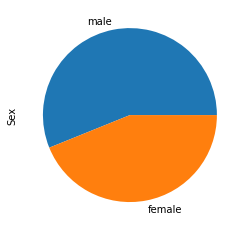

In [5]:
titanic_data[SEX_COL].value_counts().plot.pie()

Text(0.5, 1.0, 'Age')

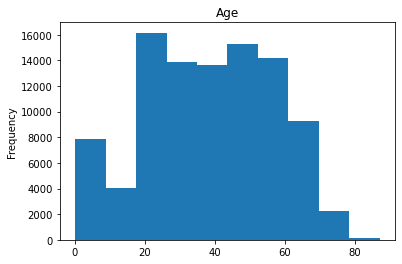

In [6]:
titanic_data[AGE_COL].plot(kind='hist', xlabel='Age').set_title('Age')

Text(0.5, 1.0, 'Ticket price')

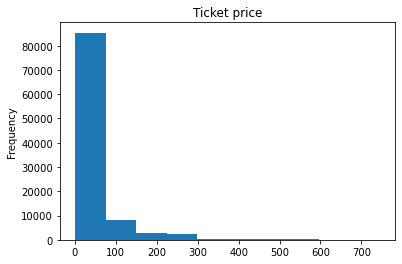

In [7]:
titanic_data[PRICE_COL].plot(kind='hist').set_title('Ticket price')

<AxesSubplot:ylabel='Embarked'>

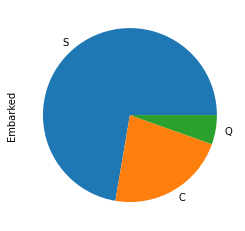

In [8]:
titanic_data[PORT_COL].value_counts().plot.pie()

<AxesSubplot:ylabel='Pclass'>

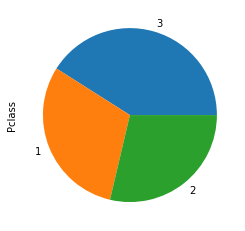

In [9]:
titanic_data[CLASS_COL].value_counts().plot.pie()

Text(0.5, 1.0, 'Siblings/Sproud abroad')

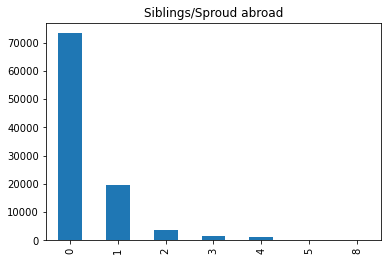

In [10]:
titanic_data[SIBSP_COL].value_counts().sort_index().plot(kind='bar').set_title('Siblings/Sproud abroad')

Text(0.5, 1.0, 'Parents/Childs abroad')

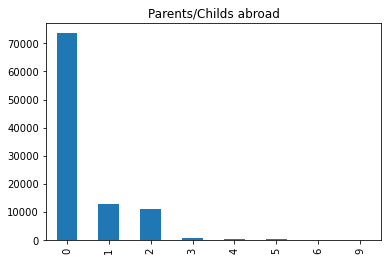

In [11]:
titanic_data[PARCH_COL].value_counts().sort_index().plot(kind='bar').set_title('Parents/Childs abroad')

Passanger names include the person status, that could be usefull for data analysis:

On the moment of Titanic crash(11:40 pm), a lot of passengers should be in the cabins, that conditions the value of cabin information: 
https://habrastorage.org/r/w1560/files/ddf/307/0c6/ddf3070c69e0450184e35790f72917d1.jpeg
The higher cabin should mean higher chanse of Survive.

# Data quality assessment

In [13]:
titanic_data[titanic_data[NAME_COL].duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Status
PassengerId,,,,,,,,,,,,


No duplicated found

In [13]:
print('Columns with Nans:')
for c in range(len(column_names)):
    if titanic_data[column_names[c]].hasnans:
        print (column_names[c])
        print (str(len(titanic_data[titanic_data[column_names[c]].isna()]) / DATA_LEN *100) + '% of Nans')

Columns with Nans:
Age
3.292% of Nans
Ticket
4.623% of Nans
Fare
0.134% of Nans
Cabin
67.866% of Nans
Embarked
0.25% of Nans


Age gaps need to be replaced with the mean of person status

In [14]:
list_of_statuses = titanic_data[STATUS_COL].unique()
for i in range(len(list_of_statuses)):
    status = list_of_statuses[i]
    mean = titanic_data[titanic_data[STATUS_COL] == status][AGE_COL].dropna().mean()
    mean = round(mean*2)/2
    titanic_data[titanic_data[STATUS_COL] == status] = titanic_data[titanic_data[STATUS_COL] == status].fillna({AGE_COL:mean})
    
print('Age column has Nans:' + str(titanic_data[AGE_COL].hasnans))

ValueError: cannot convert float NaN to integer

Because of possible great importance of cabin information, we don't drop this column, though data is 77% missing.

In [19]:
titanic_data[CABIN_COL].unique()

array(['C', 'N', 'A', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In cabin T was living only one man, according to info from Encyclopedia Titanic, so it can be deleted.
For others change we value just to the first letter to make the data easy to analyse. And fill the Nans.

In [20]:
titanic_data.at[titanic_data[CABIN_COL].notna(),CABIN_COL] = titanic_data[titanic_data[CABIN_COL].notna()][CABIN_COL].apply(lambda x : x[0:1])
titanic_data[CABIN_COL] = titanic_data[CABIN_COL].fillna('NO INFO')
titanic_data.at[titanic_data[CABIN_COL] == 'T',CABIN_COL] = 'NO INFO'
sorted(titanic_data[CABIN_COL].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'N']

Embarked Port is missing only in two rows, so fill we just with the most popular - S

In [18]:
titanic_data[PORT_COL] = titanic_data[PORT_COL].fillna('S')

There are ticket prices equal to 0, that must be an error. Fill we zeros with the mean of class price. 

In [24]:
for cl in range(3):
    mask = titanic_data[CLASS_COL]==(cl+1)
    mean_price = titanic_data.loc[mask][PRICE_COL].mean()
    mask = mask & (titanic_data[PRICE_COL]==0)
    titanic_data.loc[mask,PRICE_COL] = mean_price

Now the plot look like this:

Text(0.5, 1.0, 'Ticket price')

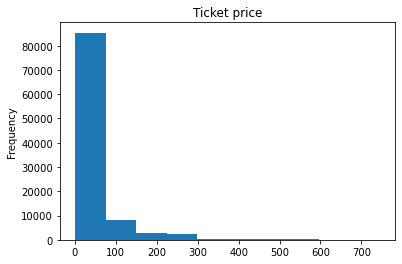

In [25]:
titanic_data[PRICE_COL].plot(kind='hist').set_title('Ticket price')

# Data exploration

In [26]:
#create a function that show the distribution of survived and not survived by the feature
def bar_survive(feature):
    survived = titanic_data[titanic_data[SURVIVED_COL]==1][feature].value_counts()
    dead = titanic_data[titanic_data[SURVIVED_COL]==0][feature].value_counts()
    if ("NO INFO" in survived.index):
        survived = survived.drop(index='NO INFO')
    if ("NO INFO" in dead.index):
        dead = dead.drop(index='NO INFO')
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind ='bar',stacked='True')

In [27]:
#the same with class
def bar_class(feature):
    first = titanic_data[titanic_data[CLASS_COL]==1][feature].value_counts()
    second = titanic_data[titanic_data[CLASS_COL]==2][feature].value_counts()
    third = titanic_data[titanic_data[CLASS_COL]==3][feature].value_counts()
    df = pd.DataFrame([first, second,third])
    df.index = ['First','Second','Third']
    df.plot(kind ='bar',stacked='True')

<AxesSubplot:>

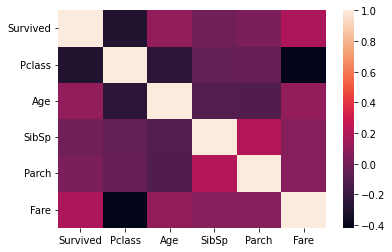

In [28]:
sns.heatmap(titanic_data.corr())

The first strong correlation with survive chance is PClass.

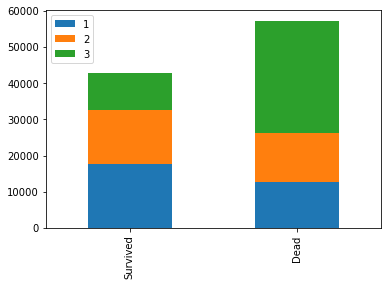

In [29]:
bar_survive(CLASS_COL)

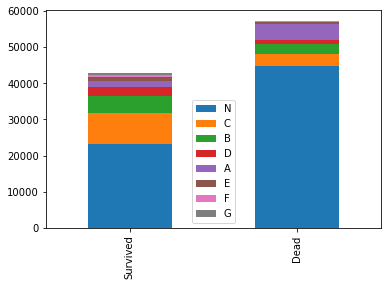

In [30]:
bar_survive(CABIN_COL)

We can also see, that the fact of existing of cabin information increases the survive chance.
But this fact correlates with PClass:

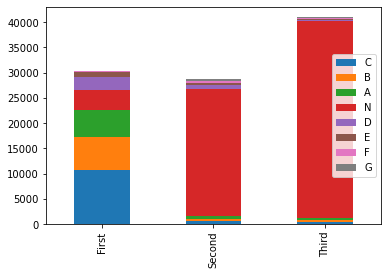

In [31]:
bar_class(CABIN_COL)

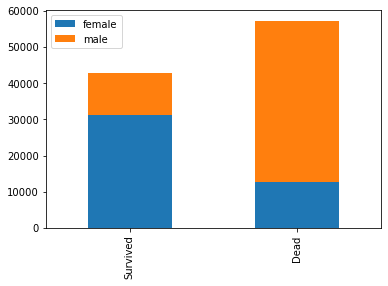

In [32]:
bar_survive(SEX_COL)

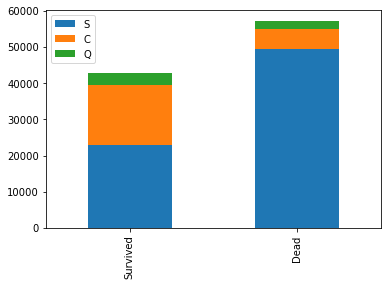

In [33]:
bar_survive(PORT_COL)

<AxesSubplot:xlabel='PassengerId', ylabel='Fare'>

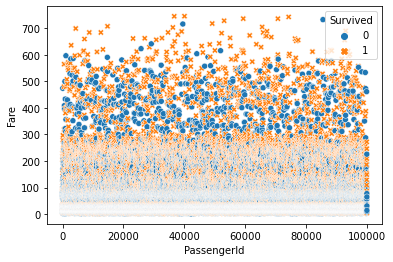

In [34]:
sns.scatterplot(data= titanic_data,x='PassengerId', y=PRICE_COL, hue=titanic_data[SURVIVED_COL], style='Survived')

### Summary

The most important factors of survive are:
* female survived more than male
* 3rd class increases chance of dead, 1st - of survive
* fare